In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw

macOS
laita.pmmh-local.espci.fr


In [4]:
date = '0223'
base = '/Volumes/Hublot24/Share_hublot/Data/'+date+'/'

savefolder = base+'Summary/Results/'
savefolder_local = '/Users/stephane/Documents/Articles/En_cours/BicWin2024/Summary/Results/'+date+'/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
    #os.makedirs(savefolder_local)

In [5]:
filename =  f'/Volumes/Hublot24/Share_hublot/Data/{date}/Summary/records_{date}.pkl'

records = rw_data.load_pkl(filename)
print(records.keys())
#buoys.read_buoy_data(filename)
#srtfiles_mesange = glob.glob(base+date+'/Drones/mesange/*/*.SRT')#/*/*.srt')
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')
#pprint(srtfiles_mesange)

dict_keys(['drones', 'phones', 'geophones', 'buoys', 'gps'])


In [209]:
import icewave.field.buoys as buoys
import icewave.field.phone as phones

In [6]:
print(records['phones'].keys())

dict_keys(['T0', 'T4', 'T6', 'T9', 'T11', 'T13', 'T16', 'T17', 'T18', 'T19'])


In [8]:
print(records['phones']['T0']['Bic24_S02_2024_0223'].keys())

dict_keys(['time', 'latitude', 'longitude', 'params', 'name', 'path'])


In [228]:
for name in ['mesange','Bernache']:
    for key in records['drones'][name].keys():
        print(name,key,records['drones'][name][key][0]['time'][0])#.keys())


mesange 04-waves_001 16:24:23
mesange 05-doc_003 16:28:40
mesange 06-waves_002 16:29:54
mesange 07-frac+waves_001 16:35:04
mesange 08-waves_003 16:38:46
mesange 10-rheo+waves_001 16:45:26
mesange 11-ortho_002 16:51:44
mesange 12-waves_004 16:58:26
mesange 13-waves_005 17:06:17
mesange 14-waves_006 17:07:37
mesange 17-waves_007 17:17:57
mesange 18-waves_008 17:22:18
mesange 19-canot_001 17:22:48
mesange 20-frac+waves_002 17:25:50
mesange 21-waves_009 17:28:31
mesange 23_waves_010 17:33:14
mesange 24-doc_005 17:37:25
mesange 25-doc_006 17:37:35
mesange 27-doc_007 17:40:32
mesange 28-waves_011 17:51:05
mesange 29-waves_012 17:56:30
mesange 30-rheo+waves_002 18:01:17
mesange 32-canot-002 18:38:27
mesange 34-waves_013 18:40:21
mesange 35-waves_014 18:48:43
mesange 37-waves_015 18:52:00
mesange 39-waves_016 19:09:58
mesange 40-waves_017 19:12:47
mesange 41-waves_018 19:13:28
mesange 42-waves_019 19:16:59
Bernache 16-waves_011 17:59:50
Bernache 17-waves_012 18:07:51
Bernache 18-doc_002 18:08:

In [207]:
records['phones']['T19']['Bic24_S02_2024_0223']['path']

'0223/Telephones/Bic24_S02_2024_0223/0001_19_Accelero_Gyro_Magneto_GPS 2024-02-23_20-22-00/_phonedata.pkl'

In [181]:
records['buoys']['B1'].keys()

dict_keys(['buoy1_sbg_20240223_1700', 'buoy1_sbg_20240223_1800'])

In [184]:
records['buoys']['B1']['buoy1_sbg_20240223_1700'].keys()

dict_keys(['latitude', 'longitude', 'time', 'path'])

In [192]:
record = records['buoys']['B1']['buoy1_sbg_20240223_1700']
data_buoy = buoys.load_data(record)
print(data_buoy['IMU'].keys())

/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B1/mat/buoy1_sbg_20240223_1700.mat
<KeysViewHDF5 ['EKF_EULER', 'EKF_NAV', 'EKF_QUAT', 'GPS1_POS', 'GPS1_VEL', 'IMU_DATA', 'MAG', 'STATUS', 'UTC_TIME', 'file_name', 'mdir', 'mname']>


In [210]:
record = records['phones']['T19']['Bic24_S02_2024_0223']
data_phone = phones.load_data(record)
print(data_phone.keys())

dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords', 'ai0', 'ai1', 'at0', 'at1'])


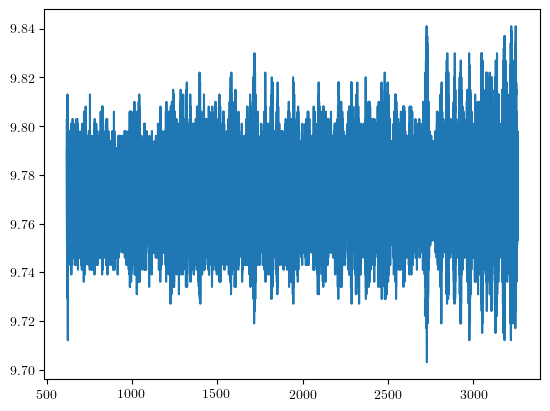

In [211]:
plt.plot(data_phone['ta'],data_phone['az'])

In [194]:
data_buoy.keys()

<KeysViewHDF5 ['#refs#', 'IMU']>

['17:28:07', '17:35:54', '17:35:56', '17:37:55', '17:44:01', '17:44:03', '17:48:01', '17:52:06', '17:52:08', '17:57:58', '17:58:10', '18:00:12', '18:00:14', '18:08:19', '18:08:19', '18:08:21', '18:16:26', '18:16:26', '18:16:28', '18:18:27', '18:24:32', '18:24:34', '18:28:00', '18:28:36', '18:32:39', '18:32:41', '18:38:44', '18:40:45', '18:40:47', '18:48:54', '18:48:54', '18:48:56']
['17:26:00', '17:33:52', '17:33:54', '17:35:56', '17:41:52', '17:41:54', '17:45:56', '17:50:02', '17:50:04', '17:55:56', '17:56:08', '17:58:09', '17:58:11', '18:06:15', '18:06:15', '18:06:17', '18:14:23', '18:14:23', '18:14:25', '18:16:25', '18:22:30', '18:22:32', '18:25:57', '18:26:34', '18:30:38', '18:30:40', '18:36:45', '18:38:46', '18:38:48', '18:46:57', '18:46:57', '18:46:59']
['17:29:27', '17:37:21', '17:37:23', '17:39:22', '17:45:19', '17:45:21', '17:49:23', '17:53:29', '17:53:31', '17:59:21', '17:59:33', '18:01:34', '18:01:36', '18:09:42', '18:09:42', '18:09:44', '18:17:49', '18:17:49', '18:17:51', '

(-68.853290794165, -68.850633322535, 48.32928401167, 48.32985575493)

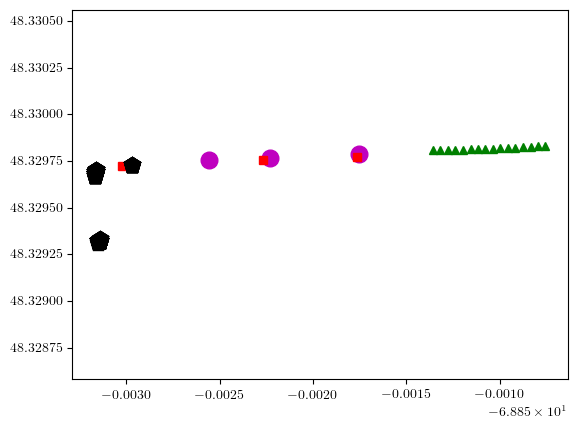

In [256]:
couples = [('B1','T19'),('B2','T13'),('B4','T0')]#,('B5','T0')]

for couple in couples:
    instrument = 'buoys'
    key = couple[0]
    k = list(records[instrument][key].keys())[0]
    lat = records[instrument][key][k]['latitude']
    lon = records[instrument][key][k]['longitude']
    plt.plot(lon,lat,'mo',markersize=12)

    instrument = 'phones'
    key = couple[1]
    k = 'Bic24_S02_2024_0223'
    lat = float(records[instrument][key][k]['latitude'])
    lon = float(records[instrument][key][k]['longitude'])
    plt.plot(lon,lat,'rs')

for key in records['geophones'].keys():
    for k in records['geophones'][key].keys():
        #.keys()
        hour=int(records['geophones'][key][k]['time'][18].split(':')[0])
        if hour<19:
            print(records['geophones'][key][k]['time'])
            lat = np.mean(records['geophones'][key][k]['latitude'])
            lon = np.mean(records['geophones'][key][k]['longitude'])
            #pprint(lat[0])
            plt.plot(lon,lat,'g^')

names = ['20-waves_013','17-waves_012','21-waves_014']
#name = '17-waves_012'# 18:07:51
#name = '21-waves_014'# 18:34:16
for name in names:
    lat = records['drones']['Bernache'][name][0]['latitude']
    lon = records['drones']['Bernache'][name][0]['longitude']
    plt.plot(lon,lat,'kp',markersize=12)


plt.axis('equal')

In [244]:
records['drones']['Bernache'][name][0].keys()

dict_keys(['record_time', 'time', 'date', 'frame', 'latitude', 'longitude', 'params', 'name', 'path'])

In [7]:
print(base)

/Volumes/Hublot24/Share_hublot/Data/0223/


['/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B1/mat/buoy1_sbg_20240223_1700.mat', '/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B1/mat/buoy1_sbg_20240223_1800.mat']
/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B1/mat/buoy1_sbg_20240223_1700.mat
1708706043.0 2024-02-23 17:34:03
<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>
/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B1/mat/buoy1_sbg_20240223_1800.mat
1708706043.0 2024-02-23 17:34:03
<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>
0


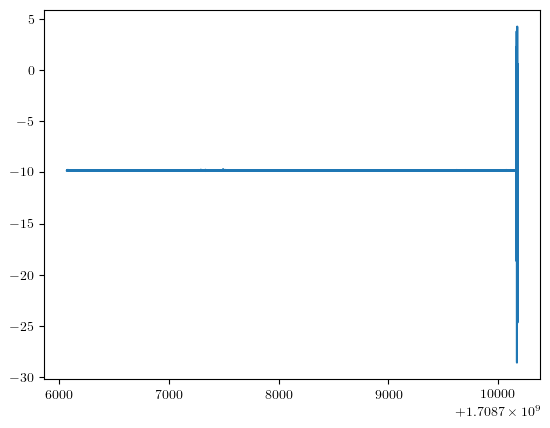

In [86]:
filenames = glob.glob(base+'/boueeVague/B1/mat/*.mat')
#filename = base+'/boueeVague/B2/mat/buoy2_sbg_20240223_1800.mat'

print(filenames)
t = []
az = []
ay = []
ax = []

buoy_sig = {}
buoy_sig['t']=[]

var = 'a'
coords = ['X','Y','Z']
for coord in coords:
    buoy_sig[var+coord]=[]

for i,filename in enumerate(filenames):
    data_buoy = buoys.read_buoy_data(filename)
    if i==0:
        tbuoys,ts = buoys.get_time(data_buoy)
    print(tbuoys,ts)

    print(data_buoy['IMU']['IMU_DATA'].keys())
    buoy_sig['t']= buoy_sig['t']+list(data_buoy['IMU']['IMU_DATA']['TIME_STAMP'][0])
    for coord in coords:
        buoy_sig[var+coord]=buoy_sig[var+coord]+list(data_buoy['IMU']['IMU_DATA']['ACCEL_'+coord][0])

        
for key in buoy_sig.keys():
    buoy_sig[key] = np.asarray(buoy_sig[key])

buoy_sig['t']=buoy_sig['t']*10**(-6)

#print(len(buoy_sig['t']))
#print(t[:10],az[:10])
#print(az[:10])
i1 = 10**5
print(len(az))
plt.plot(buoy_sig['t']+tbuoys,buoy_sig['aZ'])
#srtfiles_mesange = glob.glob(base+date+'/Drones/mesange/*/*.SRT')#/*/*.srt')
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')
#pprint(srtfiles_mesange)

In [87]:
date = '2024_0223'
year,day = date.split('_')

base = '/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/'
#base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
#folder = base+'Data/'+year+'/'+day+'/T_00*'
folder = base +'000*'
#norme_folder = base + 'Nomenclature/'
#savefolder = base+'Data/'+year+'/'+day+'/Results'
savefolder = base + 'Results/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
print(folder)
folderlist = glob.glob(folder)

for i,f in enumerate(folderlist):
    print(i,f)
#folder = os.path.dirname(filelist[0])

/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/000*
0 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_00_Accelero_Gyro_Magneto_GPS 2024-02-23 19-38-12
1 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_04_Accelero_Gyro_Magneto_GPS 2024-02-23 19-36-09
2 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_06_Accelero_Gyro_Magneto_GPS 2024-02-23 19-40-09
3 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_09_Accelero_Gyro_Magneto_GPS 2024-02-23 19-41-02
4 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_11_Accelero_Gyro_Magneto_GPS 2024-02-23 19-41-18
5 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_13_Accelero_Gyro_Magneto_GPS 2022-04-22 06-53-13
6 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_16_Accelero_Gyro_Magneto_GPS 2024-02-23_20-18-31
7 /Volumes/Hublot24/Share_h

In [88]:
import icewave.phone.load as load

print(folderlist[9])
data = load.load(folderlist[9])
data = load.sort(data)
print(data.keys())


/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_19_Accelero_Gyro_Magneto_GPS 2024-02-23_20-22-00
a
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_19_Accelero_Gyro_Magneto_GPS 2024-02-23_20-22-00/Accelerometer.csv
g
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_19_Accelero_Gyro_Magneto_GPS 2024-02-23_20-22-00/Gyroscope.csv
l
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_19_Accelero_Gyro_Magneto_GPS 2024-02-23_20-22-00/Location.csv
m
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_19_Accelero_Gyro_Magneto_GPS 2024-02-23_20-22-00/Magnetometer.csv
dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords'])


dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords'])
Number of points per bin :248
Number of bins : 683
Duration of recording : 2650.4


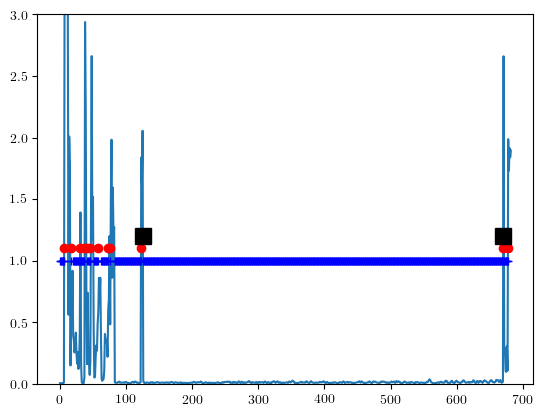

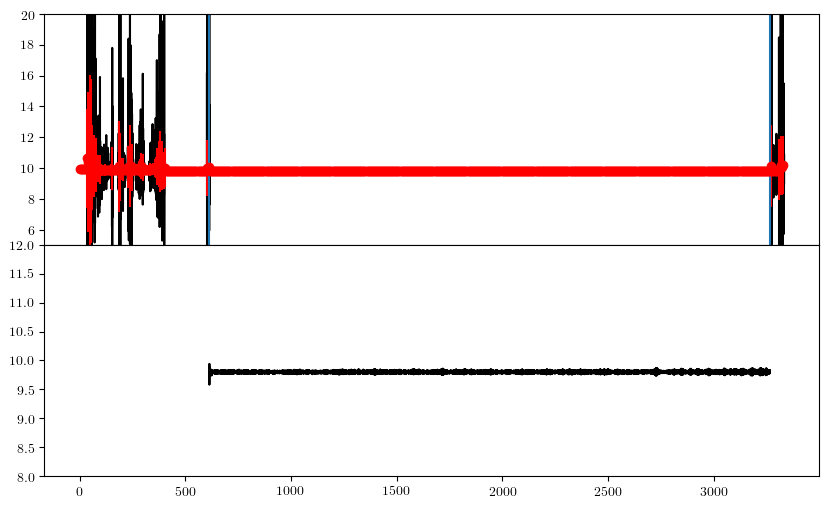

In [89]:
import icewave.phone.analyse as analyse

data = analyse.find_measure_interval(data,var='a',S0=0.5,display=True)#,Dt=5,S0=1,display=False):
data_f = analyse.cut(data)

In [46]:
data['loc']['lat']#.keys()

array([48.32994667, 48.32994167, 48.32992667, ..., 48.32977167,
       48.32977167, 48.32977167])

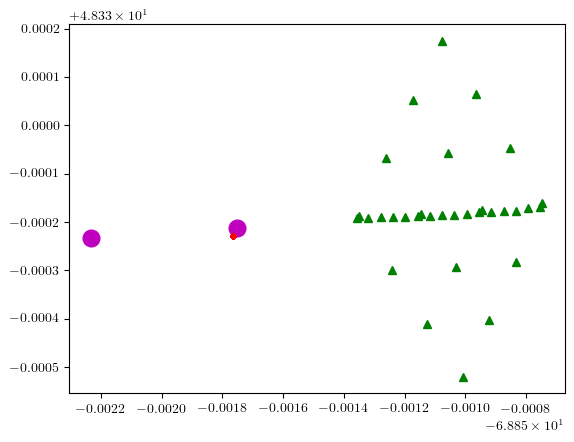

In [90]:
couples = [('B1','T19'),('B2','T13')]#,('B4','T0'),('B5','T0')]

for couple in couples:
    instrument = 'buoys'
    key = couple[0]
    k = list(records[instrument][key].keys())[0]
    lat = np.mean(records[instrument][key][k]['latitude'])
    lon = np.mean(records[instrument][key][k]['longitude'])
    plt.plot(lon,lat,'mo',markersize=12)

    instrument = 'phones'
    key = couple[1]
    k = 'Bic24_S02_2024_0223'
    
    lat = data_f['loc']['lat']#float(records[instrument][key][k]['latitude'])
    lon = data_f['loc']['lon']#float(records[instrument][key][k]['longitude'])
    plt.plot(lon,lat,'r.')

for key in records['geophones'].keys():
    for k in records['geophones'][key].keys():
        #.keys()
        lat = np.mean(records['geophones'][key][k]['latitude'])
        lon = np.mean(records['geophones'][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'g^')

In [79]:
data_f['time']

{'event_START': 'START',
 'experi_START': '0.000000000E0',
 'system_START': '2022-04-22 05:57:50.172 UTC+02:00',
 'event_PAUSE': 'PAUSE',
 'experi_PAUSE': '3.319699153E3',
 'system_PAUSE': '2022-04-22 06:53:09.871 UTC+02:00'}

In [91]:
import icewave.field.phone as phone
tphone = phone.get_time_utc(data_f['time']['system_START'])
print(tphone)

1708706856.092


Duration of recording : 2650.4
[9.77400017 9.79095078 9.77895069 9.76500034 9.76695061 9.80100059
 9.76005077 9.77700043 9.92805004 9.77895069]


(9.6, 10.0)

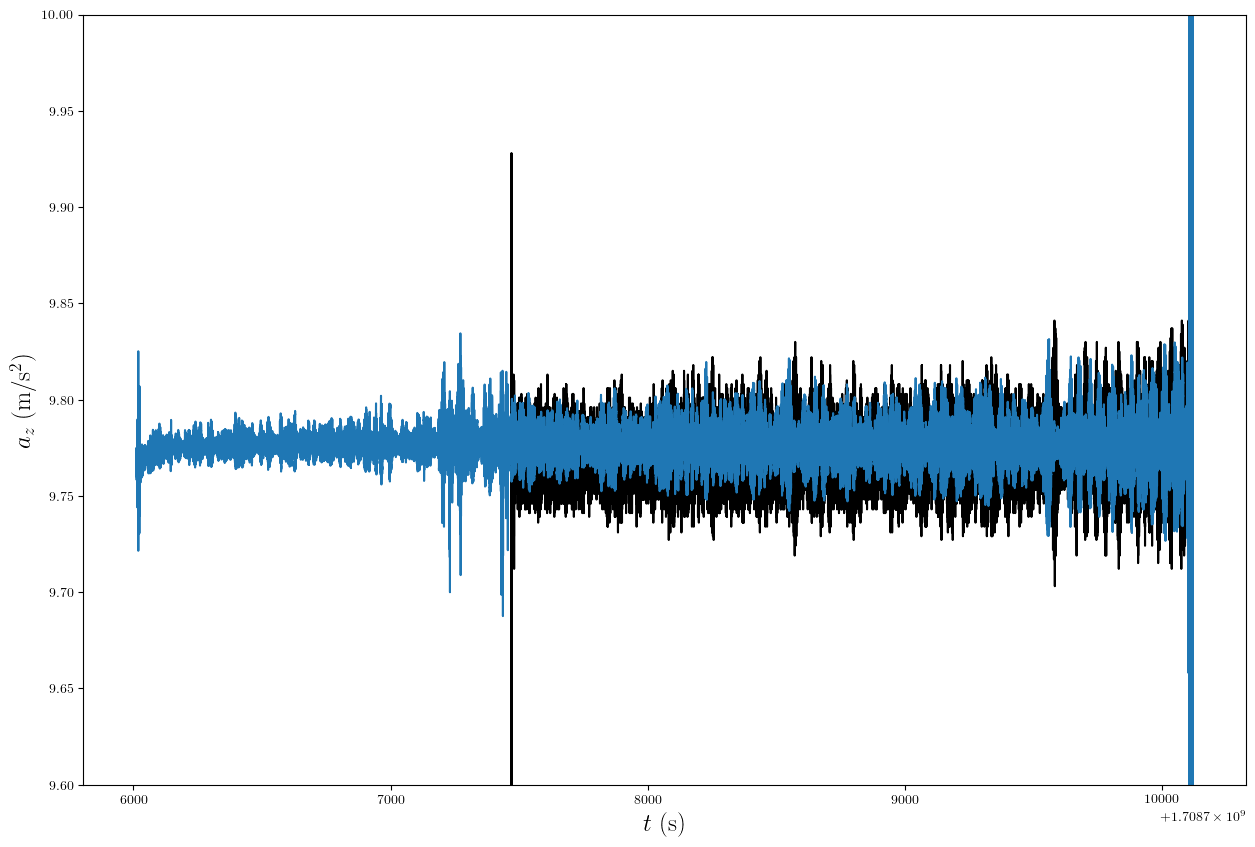

In [92]:
#data = analyse.find_measure_interval(data,var='a',Dt=5,S0=1,display=False)
data_f = analyse.cut(data,v='a')
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(data_f['ta']+tphone,data_f['az'],'k')

#    plt.ylim([9.5,10.2])
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','')#ax=axs[i])


[b,a] = sig.butter(6,0.1,'low')
az_f =  sig.filtfilt(b,a,data_f['az'])

'#F4AD3C'
#ax.plot(data_f['ta'],az_f,color=(244/256,73/256,60/256))
   
print(data_f['az'][:10])

plt.plot(buoy_sig['t']+tbuoys-60.5,-buoy_sig['aZ']-0.03)

#plt.xlim([tbuoys-400,tbuoys+500])

#ax.set_xlim([2200+tbuoys,4000+tbuoys])
ax.set_ylim([9.6,10.0])
#ticks = np.linspace(9.4,10.2,5)
#ax.set_yticks(ticks)
#fig.subplots_adjust(hspace=0)
#graphes.save_figs(figs,savedir=savefolder,prefix='unsync_0223_front',overwrite=True)

In [52]:
print(np.mean(np.diff(buoy_sig['t'])))
print(np.mean(np.diff(data_f['ta'])))

0.019999926960738962
0.01964551858470707


NameError: name 'buoy_sig' is not defined

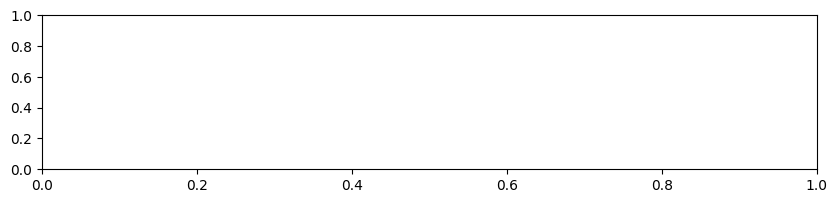

In [9]:
import scipy.signal as sig
import scipy.interpolate as interp

fig,ax = plt.subplots(figsize=(10,2))


dt = 0.02
t1 = buoy_sig['t']+tbuoys
y1 = -buoy_sig['aZ']

i0 = 100000
i1 = 150000
tcut = i0*dt
t1 = t1[i0:i1]
y1 = y1[i0:i1]
#print(tcut)


y1mean = np.mean(y1)
y1  = y1-y1mean

t2 = data_f['ta']+tphone
y2 = data_f['az']

[b,a] = sig.butter(6,0.1,'low')
y2 =  sig.filtfilt(b,a,y2)

y2mean = np.mean(y2)
y2  = y2-y2mean

#plt.plot(t1,y1)
#plt.plot(t2,y2)

f1 = interp.interp1d(t1,y1)
f2 = interp.interp1d(t2,y2)

dt = 0.02
ti1 = np.arange(np.min(t1),np.max(t1),dt)
ti2 = np.arange(np.min(t2),np.max(t2),dt)

print(len(ti1),len(ti2))
yi1 = f1(ti1)
yi2 = f2(ti2)

C = sig.correlate(yi1,yi2,mode="full")
lags = sig.correlation_lags(len(yi1),len(yi2), mode='full')#*dt#-tcut

#plt.plot(lags,C)

i0 = np.argmax(C)
Dt = lags[i0]
#plt.xlim([-600,-520])
print(Dt)
#plt.plot(lags[i0],C[i0],'ro')

i1 = np.arange(len(yi1))
i2 = np.arange(len(yi2))

Dt0 = (ti1[0]-ti2[0])
#print(len(yi1),len(i1))

import datetime
print(ti1[0])


time2 = t2+Dt*dt+Dt0
time1 = t1


time2_f = datetime.datetime.fromtimestamp(time2[0])
print(time2_f)
tref = str(time2_f).split(' ')[0]+' 00:00:00'
print(tref)
tref = datetime.datetime.strptime(tref, '%Y-%m-%d %H:%M:%S')

def today_time(times,tref):
    tdtime = []
    for t in times:
        t =  datetime.datetime.fromtimestamp(t)#datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
        tdtime.append((t - tref).total_seconds())
    return tdtime

time2 = today_time(time2,tref)
time1 = today_time(time1,tref)


ax.plot(time2,y2+y2mean+0.035)
ax.plot(time1,y1+y1mean)

#/len(buoy_sig['aZ'])
#plt.figure()
#plt.plot(i1,yi1)
#plt.plot(i2+Dt,yi2)
#plt.xlim([ti1[0],ti1[0]+150])
plt.ylim([9.7,9.90])

tmin = multi.convert_time('17:15:00')
tmax = multi.convert_time('18:20:00')
plt.xlim([tmin,tmax])

def display_time(times):
    timestamps=[]
    for t in times:
        hour = int(t/3600)
        minute = int((t-hour*3600)/60)
        sec = int(t-hour*3600-minute*60)
        if sec<10:
            sec = '0'+str(sec)
        timestamps.append(f'{hour}:{minute}:{sec}')
    return timestamps

ticks = np.linspace(tmin,tmax,6)
ax.set_xticks(ticks,display_time(ticks))

ax.legend(['T19','B1'])
figs = graphes.legende('UTC Time','$a_z$ (m/s$^{-2}$)','02/23')
#graphes.save_figs(figs,savedir=savefolder_local)

print(Dt*dt+Dt0)


datetime.datetime(2024, 2, 23, 18, 7, 50)

1708708070.885
18:07:50


In [ ]:


f1 = interp.interp1d(t1,y1)
f2 = interp.interp1d(t2,y2)

 
dt = 0.02
ti1 = np.arange(0,np.max(t1),dt)
ti2 = np.arange(0,np.max(t2),dt)

yi1 = f1(ti1)
yi2 = f2(ti2)



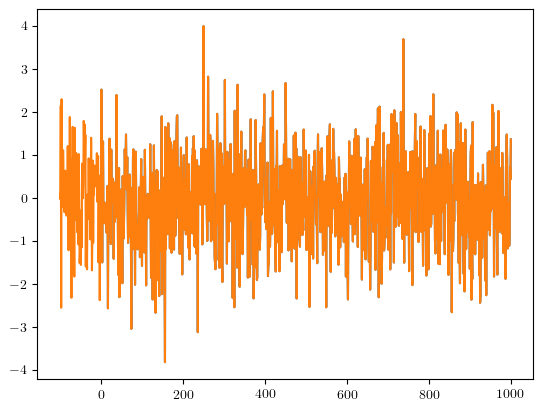

In [278]:
import numpy as np

from scipy import signal

rng = np.random.default_rng()

x = rng.standard_normal(1000)

y = np.concatenate([rng.standard_normal(100), x])

correlation = signal.correlate(x, y, mode="full")

lags = signal.correlation_lags(x.size, y.size, mode="full")

lag = lags[np.argmax(correlation)]

t1 = np.arange(len(x))
t2 = np.arange(len(y))

plt.plot(t1,x)
plt.plot(t2+lag,y)

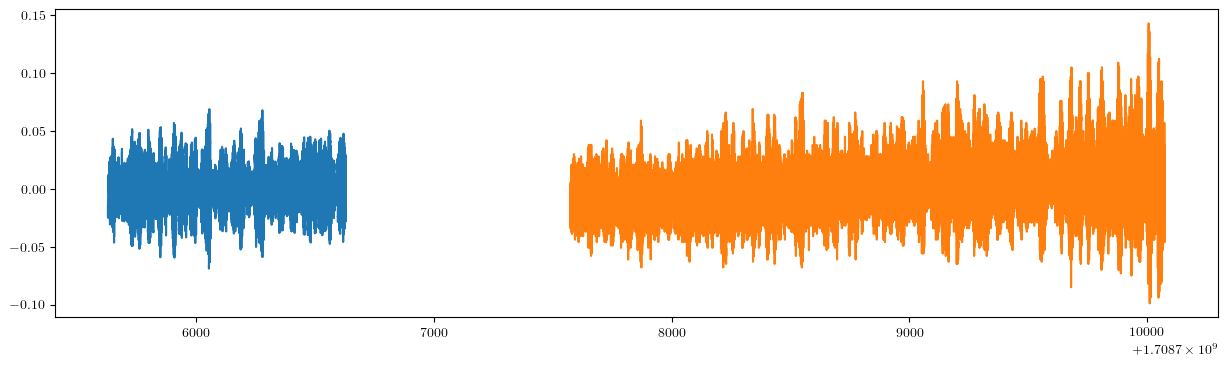

In [266]:
fig,ax = plt.subplots(figsize=(15,4))#,nrows=5,sharex=True)


plt.plot(t1+Dt,y1)
plt.plot(t2,y2)

#ax.set_xlim([2000+tbuoys,2500+tbuoys])
#ax.set_ylim([-0.5,0.5])


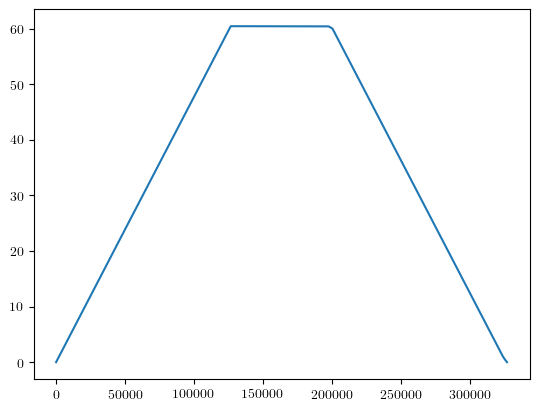

In [186]:
#plt.xlim([])

In [79]:
data_buoy['IMU']['IMU_DATA']['t']

<HDF5 dataset "t": shape (1, 77732), type "<f8">

In [73]:
print(data_buoy['IMU'].keys())
print(data_buoy['IMU']['UTC_TIME'].keys())#.keys())#.keys())

<KeysViewHDF5 ['EKF_EULER', 'EKF_NAV', 'EKF_QUAT', 'GPS1_POS', 'GPS1_VEL', 'IMU_DATA', 'MAG', 'STATUS', 'UTC_TIME', 'file_name', 'mdir', 'mname']>
<KeysViewHDF5 ['CLOCK_STATUS', 'CRC', 'CRC_CALC', 'DAY', 'GPS_TOW', 'HOUR', 'MIN', 'MONTH', 'NANOSEC', 'SEC', 'TIME_STAMP', 'TS_fix', 'YEAR', 't', 'time']>


/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/000*
0 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_00_Accelero_Gyro_Magneto_GPS 2024-02-23 19-38-12
1 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_04_Accelero_Gyro_Magneto_GPS 2024-02-23 19-36-09
2 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_06_Accelero_Gyro_Magneto_GPS 2024-02-23 19-40-09
3 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_09_Accelero_Gyro_Magneto_GPS 2024-02-23 19-41-02
4 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_11_Accelero_Gyro_Magneto_GPS 2024-02-23 19-41-18
5 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_13_Accelero_Gyro_Magneto_GPS 2022-04-22 06-53-13
6 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_16_Accelero_Gyro_Magneto_GPS 2024-02-23_20-18-31
7 /Volumes/Hublot24/Share_h

/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40
a
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Accelerometer.csv
g
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Gyroscope.csv
l
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Location.csv
m
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Magnetometer.csv
dict_keys(['device', 'time', 'a', 'g', 'l', 'm'])


(9.6, 10.0)

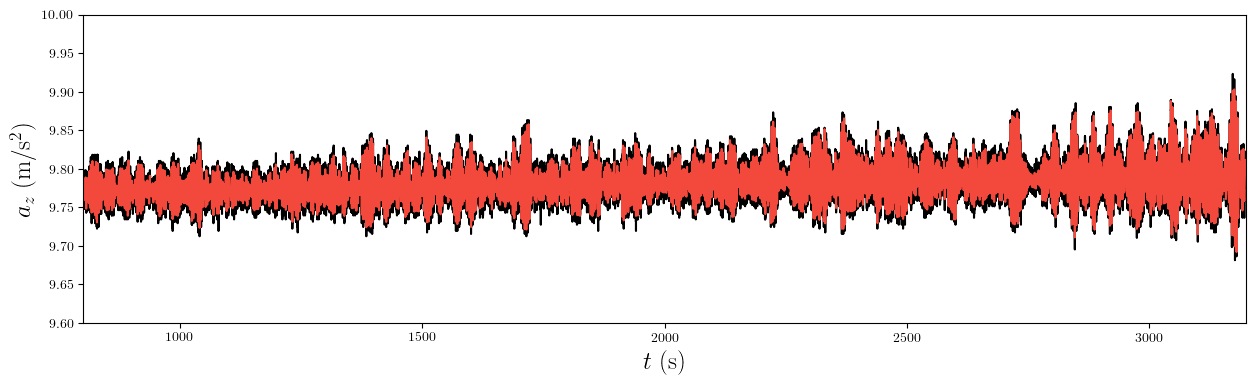

In [52]:
key = 17
fig,ax = plt.subplots(figsize=(15,4))#,nrows=5,sharex=True)
#data['a']
ax.plot(data['ta'],data['az'],'k')

#    plt.ylim([9.5,10.2])
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','')#ax=axs[i])


[b,a] = sig.butter(6,0.1,'low')
az_f =  sig.filtfilt(b,a,data['az'])

'#F4AD3C'
ax.plot(data['ta'],az_f,color=(244/256,73/256,60/256))
   
ax.set_xlim([800,3200])
ax.set_ylim([9.6,10.0])
#ticks = np.linspace(9.4,10.2,5)
#ax.set_yticks(ticks)
#fig.subplots_adjust(hspace=0)
#graphes.save_figs(figs,savedir=savefolder,prefix='unsync_0223_front',overwrite=True)

In [72]:
data_buoy['IMU']['IMU_DATA'].keys()

<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>

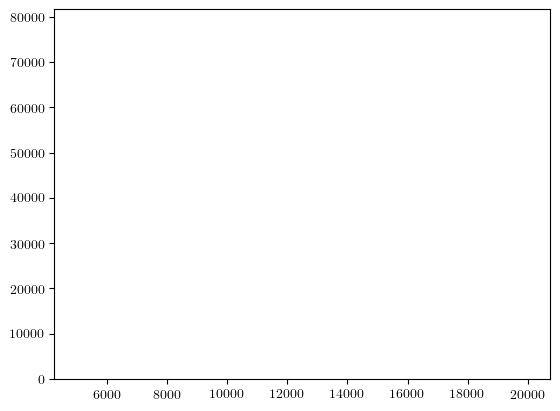

In [26]:
ax = plt.hist(np.diff(data_buoy['IMU']['IMU_DATA']['TIME_STAMP'][0]),10000)

(0.0, 1000.0)

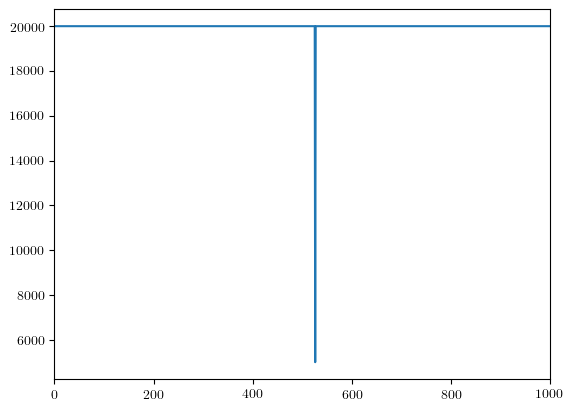

In [29]:
plt.plot(np.diff(data_buoy['IMU']['IMU_DATA']['TIME_STAMP'][0]))
plt.xlim([0,1000])

31.0928


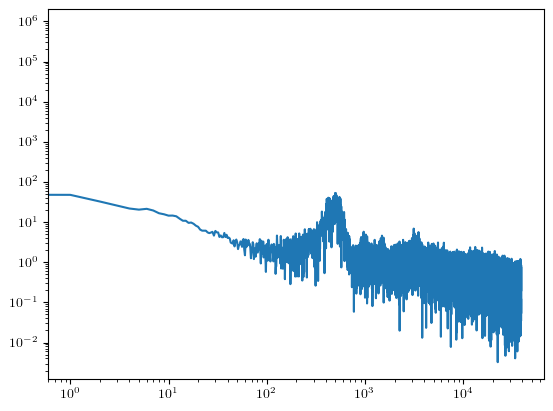

In [50]:
TF = np.fft.fft(data_buoy['IMU']['IMU_DATA']['ACCEL_Z'][0])
n = len(TF)
TF = TF[:int(n/2)]
plt.loglog(np.abs(TF))

#plt.xscale('log)
#plt.xlim([200,1000])
#plt.ylim([0.1,100])

print(n/500*0.2)

dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords', 'ai0', 'ai1', 'at0', 'at1'])
Number of points per bin :248
Number of bins : 686


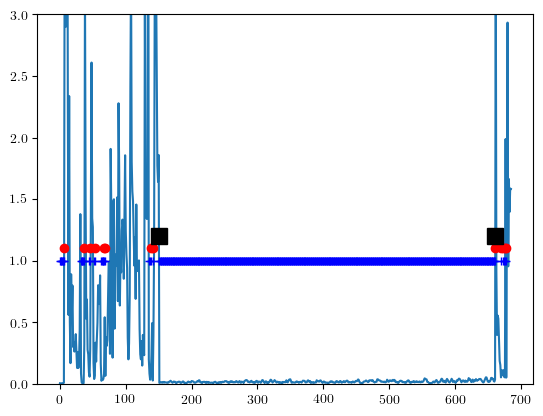

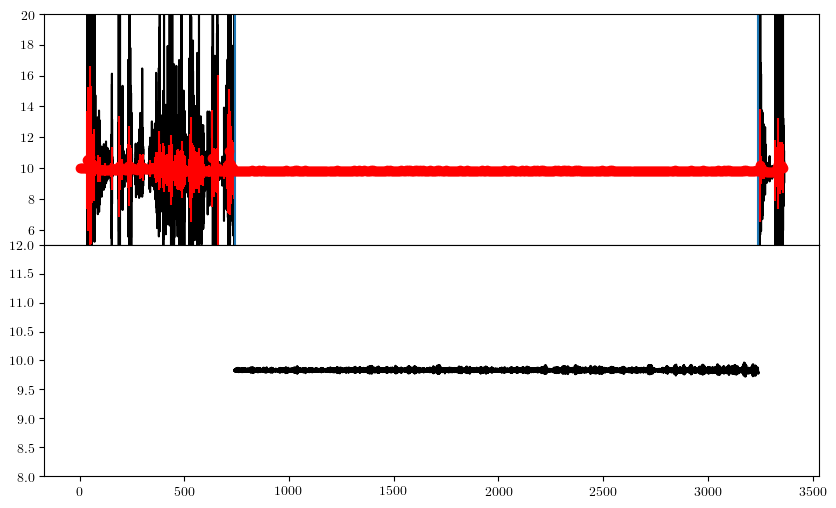

In [91]:


plt.figure()
    
TF = np.fft.fft(data_f['az'])#'IMU']['IMU_DATA']['ACCEL_Z'][0])
n = len(TF)
TF = TF[:int(n/2)]
plt.loglog(np.abs(TF))

#plt.xscale('log)
#plt.xlim([200,1000])
#plt.ylim([100,10**4])

print(n/500*0.2)

dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords', 'ai0', 'ai1', 'at0', 'at1'])
Number of points per bin :248
Number of bins : 686
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True

[autoreload of icewave.phone.analyse failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.9_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/stephane/Documents/git/icewave/icewave/phone/anal

IndexError: boolean index did not match indexed array along dimension 0; dimension is 542 but corresponding boolean dimension is 541

In [58]:
data.keys()

dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords', 'ai0', 'ai1', 'at0', 'at1'])

In [ ]:

sig.correlate(yB,yT,mode='same')

B1 -68.85175305691494
B1 -68.85175164443312
B2 -68.85223142278954
B2 -68.85222264121369
B4 -68.85255580714285
B4 -68.85255306682727
48.329783851803526


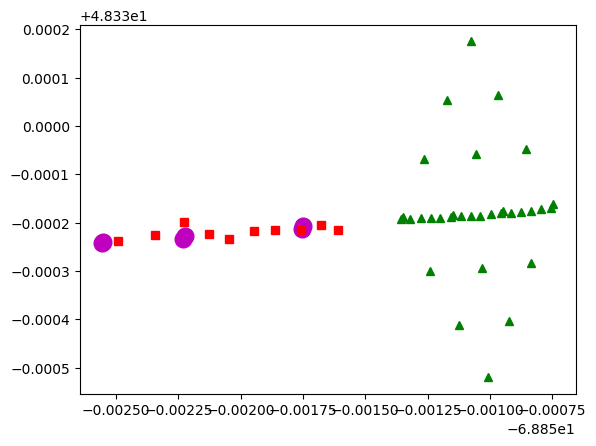

In [61]:

instrument = 'buoys'
for key in records[instrument].keys():
    if key=='B5':
        continue
    for k in records[instrument][key].keys():
        lat = np.mean(records[instrument][key][k]['latitude'])
        lon = np.mean(records[instrument][key][k]['longitude'])
        #pprint(lat[0])
        print(key,lon)

        plt.plot(lon,lat,'mo',markersize=12)


instrument = ['phones','buoys','geophones']

instrument = 'phones'
for key in records[instrument].keys():
    for k in records[instrument][key].keys():
        lat = float(records[instrument][key][k]['latitude'])
        lon = float(records[instrument][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'rs')
        

#plt.plot(lon2,lat2,'rs')

print(lat)

for key in records['geophones'].keys():
    for k in records['geophones'][key].keys():
        #.keys()
        lat = np.mean(records['geophones'][key][k]['latitude'])
        lon = np.mean(records['geophones'][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'g^')

#        pprint(records['geophones'][key][k]['time']) 


In [63]:
records['buoys']['B1'].keys()

dict_keys(['buoy1_sbg_20240223_1700', 'buoy1_sbg_20240223_1800'])

In [68]:
records['phones'].keys()

dict_keys(['T0', 'T4', 'T6', 'T9', 'T11', 'T13', 'T16', 'T17', 'T18', 'T19'])

In [81]:
records['buoys'].keys()

dict_keys(['B1', 'B2', 'B4', 'B5'])

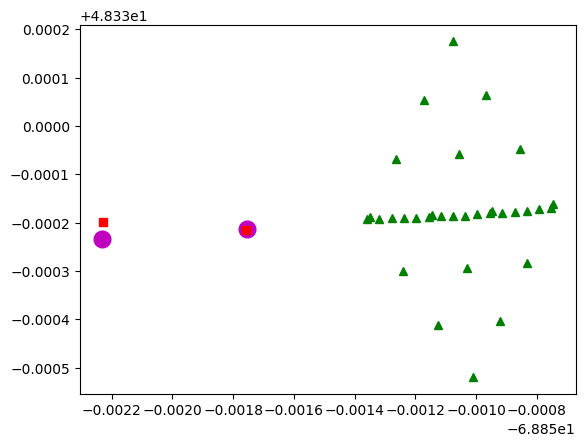